# 08. 이미지를 분류합니다. -합성곱 신경망

## 08-1 합성곱 연산에 대해 알아봅니다

합성곱 신경망을 이해하려면 먼저 합성곱(convolution)연산과 교차 상관(cross-correlation) 연산에 대해 알아야 합니다.

### 합성곱을 그림으로 이해합니다.

합성곡은 두 함수에 적용하여 새로운 함수를 만드는 수학 연산자입니다. 합성곱은 글보다 그림으로 이해하는 것이 쉽습니다.


!책 참조!


In [0]:
import numpy as np

w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

In [2]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [3]:
w_r = w[::-1]
w_r

array([3, 5, 1, 2])

In [4]:
for i in range(6):
  print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [5]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

### 합성곱 신경망은 진짜 합성곱을 사용하지 않습니다.

이름이 합섭곱 신경망인데 왜 합성곱을 사용하지 않는 이유는 교차 상관이라는 것을 사용하는데
합성곱과 교차 상관이 아주 비슷하다고 합니다. 합성곱과 교차상관이 차이점은 미끄러지는 배열을 뒤집지 않는다는 점이 다릅니다.

In [6]:
from scipy.signal import correlate
correlate(x, w, mode='valid')


array([48, 57, 24, 25, 16, 39])

그 이유는 머신러닝에서 가중치를 설정할 때 무작위로 설정하기 때문에 뒤집으나 안 뒤집으나 똑같기 때문에 합성곱 대신에 교차 상관을 사용하나 이름이 합성곱으로 관례처럼 불려져서 그렇다고 합니다.

### 패딩과 스트라이드를 이해합니다.


패딩(padding)은 이름에서 유추할 수 있듯이 원본 배열의 양 끝에 빈 원소를 추가하는 것을 말하고 스트라이드(stride)는 미끄러지는 배열의 간격을 조절하는 것을 말합니다.

패딩에는 밸리드 패딩, 풀 패딩, 세임 패딩이 있습니다.

밸리드 패딩은 원본 배열의 원소가 합성곱 연산에 참여하는 정도가 다릅니다.
첫 번째 원소는 연산에 1명만 참여합니다.

### 풀 패딩은 배열 원소의 연산 참여도를 동일하게 만듭니다.

이때 가상의 원소로 0을 양쪽에 채우는 것을 <b>제로 패딩</b>이라고 부르고 0으로 채워서 모든 원소의 연산 참여 횟수를 동일하게 하면 풀 패딩(full padding)이라고 합니다. 


In [7]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

### 셰임 패딩은 출력 배열의 길이를 원본 배열의 길이와 동일하게 만듭니다.

 대부분 셰임 패딩을 사용합니다.

In [8]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

스트라이드는 미끄러지는 간격을 조정합니다.
지금까지는 스트라이드 1 로 했었는데 이를 2로 바꾸면 2칸씩 미끄러지면서 연산을 수행합니다.
합성곱 신경망을 만들 때는 보통 1로 지정하여 수행합니다. 지금까지는 1차원 배열로 합성곱을 살펴봤는데
대부분 2차원 배열에 대한 합성곱을 사용합니다.

### 2차원 배열에서 합성곱을 수행합니다.

In [9]:
x = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])

w = np.array([[2, 0], [0, 0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')


array([[ 2,  4],
       [ 8, 10]])

In [10]:
correlate2d(x,w,mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [0]:
import tensorflow as tf
x_4d = x.astype(np.float).reshape(1, 3, 3, 1) # 입력의 배치, 입력의 높이, 입력이 너비, 필터의 개수
w_4d = w.reshape(2, 2, 1, 1) 

In [0]:
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')

In [13]:
# 텐서플로에서는 다차원 배열을 텐서(tesor) 라고 부릅니다.
c_out.numpy().reshape(3, 3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

## 08-2 풀링 연산에 대해 알아봅니다

풀링은 max pooling, average pooling 등이 있다.

경험적 풀링 > 스트라이드 2


In [0]:
x = np.array([[1,2,3,4],[5,6,7,8,],[9,10,11,12],[13,14,15,16]])
x = x.reshape(1, 4, 4, 1)

In [15]:
p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2, 2)

array([[ 6,  8],
       [14, 16]])

In [16]:
!pip install tensorflow-gpu==2.0.0 #요거 해줘요 numpy() 된다는거! 

## 08-3 합성곱 신경망의 구조를 알아봅니다

활성화 함수 ReLU 함수에 대해 알아보겠습니다.

In [0]:
def relu(x):
  return np.maximum(x, 0)

In [18]:
x = np.array([-1,2,-3,4,-5])
relu(x)

array([0, 2, 0, 4, 0])

In [19]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

ReLu 함수 0일 때 도함수 값은 0으로 친다

## 08-4 합성곱 신경망을 만들고 훈련합니다.

이미지가 들어오면 합성곱층에서 커널을 통해 나온 특성 맵에 ReLu 함수를 적용하고 이를 풀링층에서 받아서 크기를 줄인 특성맵을 만든 것을 펼쳐서 완전 연결층에 넣어서 소프트맥스 함수를 통해 분류한다.

* 자동 미분의 사용 방법
텐서플러와 같은 딥러닝 패키지들은 사용자가 작성한 연산을 계산 그래프(computation graph)로 만들어 자동 미분 기능을 구현합니다. 자동미분 기능을 사용하면 임의의 파이썬 코드나 함수에 대한 미분값을 계산할 수 있습니다.

In [20]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
  y = x ** 3 + 2 * x + 5
print(tape.gradient(y,x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


글로럿 초기화 방식

$-\sqrt{\cfrac{6}{입력 뉴런 수 + 출력 뉴련 수}}$ ~ $\sqrt{\cfrac{6}{입력 뉴런 수 + 출력 뉴련 수}} $ 에서 균등하게 난수를 발생시켜 가중치를 초기화 하는 것

In [0]:
class ConvolutionNetwork:
  
  def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate = 0.1):
    self.n_kernels = n_kernels
    self.kernel_size = 3
    self.optimizer = None
    self.conv_w = None
    self.conv_b = None
    self.units = units
    self.batch_size = batch_size
    self.w1 = None
    self.b1 = None
    self.w2 = None 
    self.b2 = None
    self.a1 = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate
   
  def forpass(self, x):
    # 3x3 합성곱 연산
    c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
    # 렐루 활성화 함수를 적용합니다.
    r_out = tf.nn.relu(c_out)
    # 2X2 최대 풀링을 적용합니다.
    p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
    # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
    f_out = tf.reshape(p_out, [x.shape[0], -1])
    z1 = tf.matmul(f_out, self.w1) + self.b1
    a1 = tf.nn.relu(z1)
    z2 = tf.matmul(a1, self.w2) + self.b2
    return z2
  
  def init_weights(self, input_shape, n_classes):
    g = tf.initializers.glorot_uniform()
    self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
    self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
    n_features = 14 * 14 * self.n_kernels
    self.w1 = tf.Variable(g((n_features, self.units)))
    self.b1 = tf.Variable(np.zeros(self.units),dtype=float)
    self.w2 = tf.Variable(g((self.units, n_classes)))
    self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)
   
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.init_weights(x.shape, y.shape[1])
    self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
    
    for i in range(epochs):
      print('에포크', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end='')
        self.training(x_batch, y_batch)
        batch_losses.append(self.get_loss(x_batch, y_batch))
      print()
      self.losses.append(np.mean(batch_losses))
      self.val_losses.append(self.get_loss(x_val, y_val))
  
  def gen_batch(self, x, y):
    bins = len(x) // self.batch_size
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i+1)
      yield x[start:end], y[start:end]
   
  def training(self, x, y):
    m = len(x)
    with tf.GradientTape() as tape:
      z = self.forpass(x)
      loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
      loss = tf.reduce_mean(loss)
     
    weights_list = [self.conv_w, self.conv_b, self.w1, self.b1, self.w2, self.b2]
    grads = tape.gradient(loss, weights_list)
    self.optimizer.apply_gradients(zip(grads, weights_list))
  
  def predict(self, x):
    z = self.forpass(x)
    return np.argmax(z.numpy(), axis=1)
  
  def score(self, x, y):
    return np.mean(self.predict(x) == np.argmax(y, axis=1))
  
  def get_loss(self, x, y):
    z = self.forpass(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
    return loss.numpy()
  
  
      

In [0]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                 stratify=y_train_all, test_size=0.2,
                                                 random_state=42)

In [0]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [25]:
print(x_train.shape, x_val.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

(48000, 28, 28) (12000, 28, 28)


In [0]:
x_train = x_train / 255
x_val = x_val / 255

In [31]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

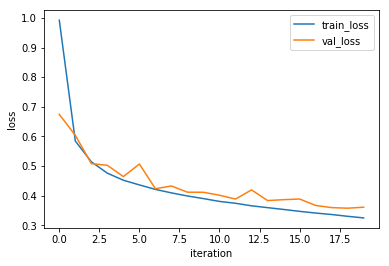

In [32]:
import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [33]:
cn.score(x_val, y_val_encoded)

0.8753333333333333

## 08-5 케라스로 합성곱 신경망을 만듭니다

케라스의 합성곱층은 Conv2D, 최대 풀링 MaxPooling2D, 펼칠 때는 Flatten

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [0]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [0]:
conv1.add(MaxPooling2D((2, 2)))

In [0]:
conv1.add(Flatten())

In [0]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [0]:
#케라스 진짜 간단하다..

In [40]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# 아담 옵티마이저
# 아담 = Adaptive MomentEstimation
# 손실함수의 값이 최적값에 가까워질수록 학습률을 낮춰 손실 함수의 값이 안정적으로 수렴될 수 있게 해줍니다.

history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 580us/sample - loss: 0.4412 - accuracy: 0.8448 - val_loss: 0.3187 - val_accuracy: 0.8867
Epoch 2/20
48000/48000 [==============================] - 26s 550us/sample - loss: 0.3047 - accuracy: 0.8901 - val_loss: 0.2922 - val_accuracy: 0.8956
Epoch 3/20
48000/48000 [==============================] - 36s 743us/sample - loss: 0.2604 - accuracy: 0.9033 - val_loss: 0.2616 - val_accuracy: 0.9073
Epoch 4/20
48000/48000 [==============================] - 35s 730us/sample - loss: 0.2298 - accuracy: 0.9146 - val_loss: 0.2556 - val_accuracy: 0.9082
Epoch 5/20
48000/48000 [==============================] - 34s 715us/sample - loss: 0.2083 - accuracy: 0.9235 - val_loss: 0.2681 - val_accuracy: 0.9027
Epoch 6/20
48000/48000 [==============================] - 34s 714us/sample - loss: 0.1858 - accuracy: 0.9308 - val_loss: 0.2493 - val_accuracy: 0.9128
Epoch 7/20
48000/48000 [====================

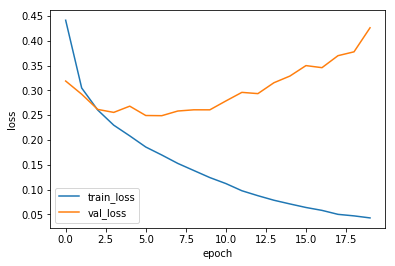

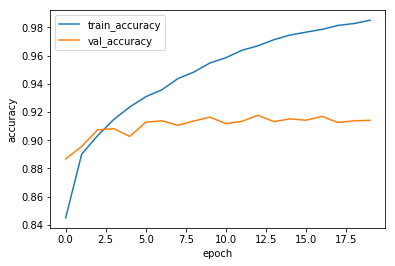

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy') #오타 loss -> accuracy
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy']) #그래프 그림 오타 train_loss -> accuracy
plt.show()


정확도는 크게 향상되었으나 val_loss 가 크게 증가하는거 + train_accuracy와 val_accuracy 차이가 커지는걸로 봐서 과대적합이 발생했음을 알 수 있습니다. 그렇다면 이 과대 적합을 없애려면 어떻게 해야할까요

### 드롭아웃을 알아봅니다.

일부 뉴런을 랜덤적으로 제외하여 훈련을 시키면 모든 뉴런이 고르게 훈련되어 타깃을 잘 예측하는 일부 뉴런에 과도하게 의존하지 않고 모든 뉴런이 의미 있는 패턴을 학습합니다. 드롭아웃은 훈련에만 적용되므로 테스트나 실전에서는 사용하지 않습니다.
다만 뉴런이 제외되면 훈련 때의 출력값이 테스트나 실전에서는 훈련 때보다 커지게 되므로 테스트나 실전에서는 출력값을 낮춰야 하는데 텐서플로에서는 오히려 훈련할 때 출력값을 드롭아웃 비율만큼 올려서 이 문제를 해결합니다.

In [0]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [48]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [49]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 62s 1ms/sample - loss: 0.5088 - accuracy: 0.8161 - val_loss: 0.3565 - val_accuracy: 0.8713
Epoch 2/20
48000/48000 [==============================] - 27s 558us/sample - loss: 0.3761 - accuracy: 0.8614 - val_loss: 0.3083 - val_accuracy: 0.8941
Epoch 3/20
48000/48000 [==============================] - 27s 563us/sample - loss: 0.3351 - accuracy: 0.8786 - val_loss: 0.2986 - val_accuracy: 0.8922
Epoch 4/20
48000/48000 [==============================] - 27s 570us/sample - loss: 0.3077 - accuracy: 0.8850 - val_loss: 0.2665 - val_accuracy: 0.9043
Epoch 5/20
48000/48000 [==============================] - 27s 559us/sample - loss: 0.2860 - accuracy: 0.8944 - val_loss: 0.2581 - val_accuracy: 0.9066
Epoch 6/20
48000/48000 [==============================] - 26s 535us/sample - loss: 0.2664 - accuracy: 0.9005 - val_loss: 0.2486 - val_accuracy: 0.9103
Epoch 7/20
48000/48000 [======================

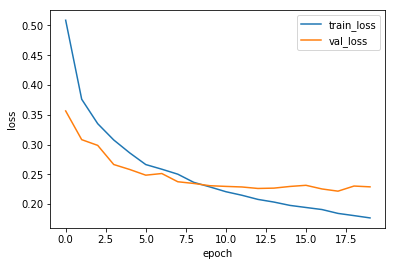

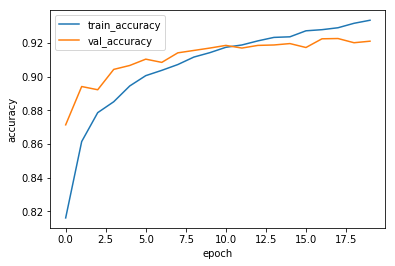

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy') #오타 loss -> accuracy
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy']) #그래프 그림 오타 train_loss -> accuracy
plt.show()


정확도 격차도 줄어들고 validation 의 loss값도 수렴하고 있는 것을 확인 할 수 있습니다.